In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import os

In [2]:
cell_line_alias = {'E116': 'GM1287', 'E123': 'K562', 'E122': 'HUVEC'}

In [3]:
def make_barplots(classification_res, ylab):

    fig, ax = plt.subplots(figsize=(20, 5))
    bar_width = 0.2
    index = np.arange(len(classification_res.columns))
    
    for i, model in enumerate(classification_res.index):
        ax.bar(index + i * bar_width, classification_res.loc[model], bar_width, label=model)
    
    ax.set_ylabel(ylab)
    ax.set_ylim(0.8, 0.95)
    ax.set_xticks(index + bar_width * (len(classification_res.index) - 1) / 2)
    ax.set_xticklabels([])  # Remove the default x-tick labels
    
    for i in range(len(cell_line_alias)):
        ax.text(index[i] + bar_width * (len(classification_res.index) - 1) / 2, 
                0.96,
                cell_line_alias[list(cell_line_alias.keys())[i]],
                ha='center', va='bottom', fontsize=20)
    
    ax.legend(title='Model')
    plt.show()

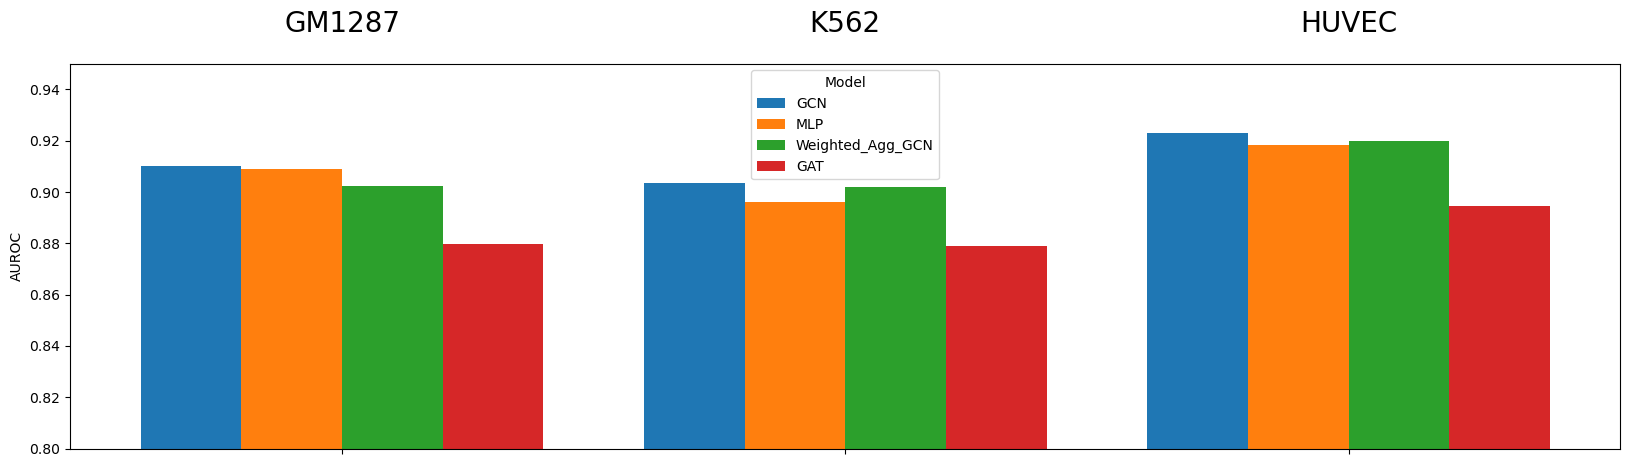

In [4]:
classification_AUROC_res = pd.read_csv('classification_AUROC_res.csv', index_col = 0)
make_barplots(classification_AUROC_res, ylab = 'AUROC')

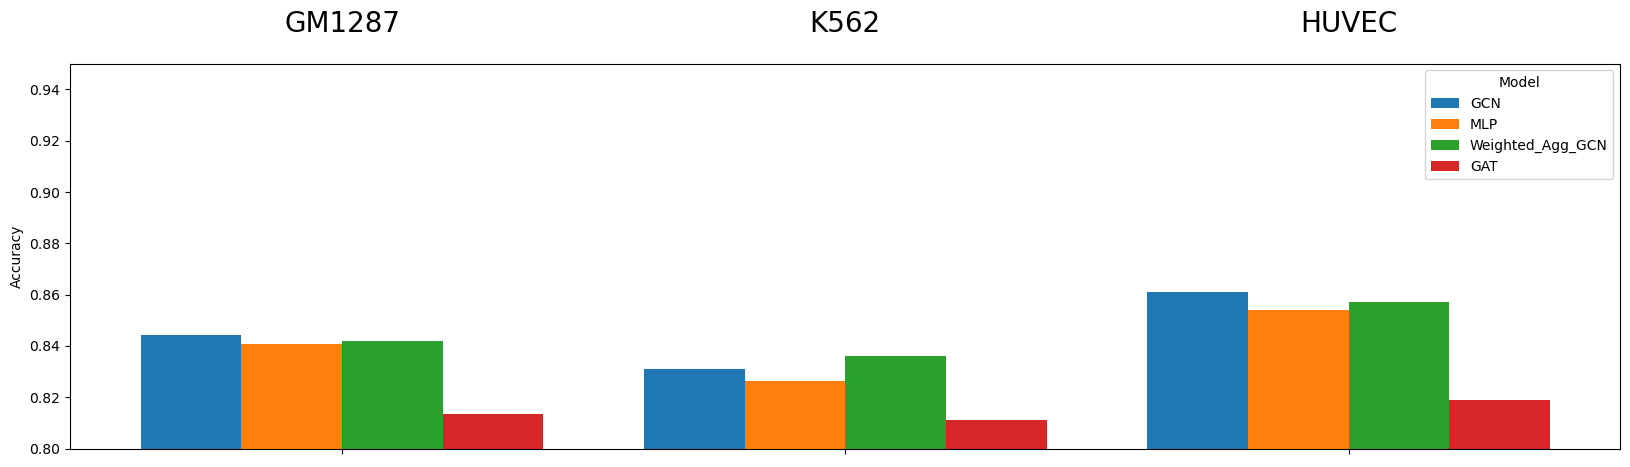

In [5]:
classification_acc_res = pd.read_csv('classification_accuracy_res.csv', index_col = 0)
make_barplots(classification_acc_res, ylab = 'Accuracy')

In [6]:
all_losses = pd.read_csv('all_losses.csv', index_col = 0)
all_losses = all_losses.map(literal_eval)

models = list(all_losses.index)
num_epochs = np.arange(1, 1001)

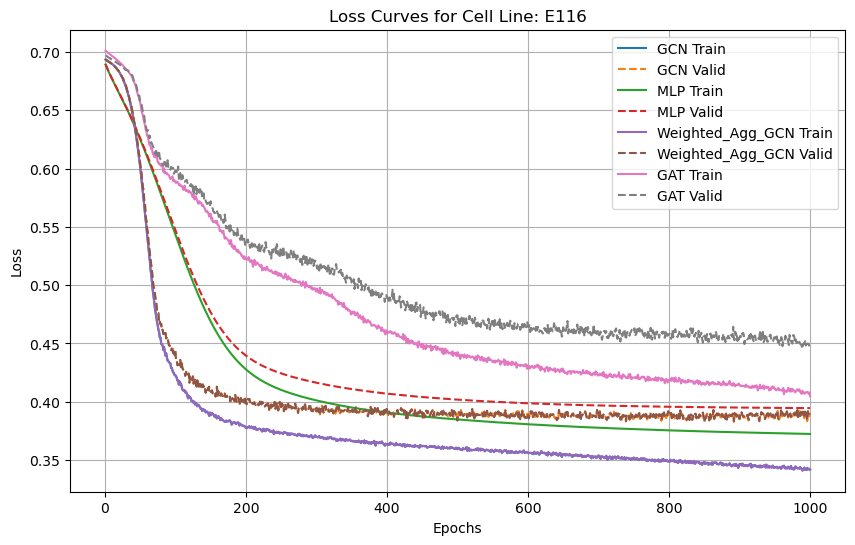

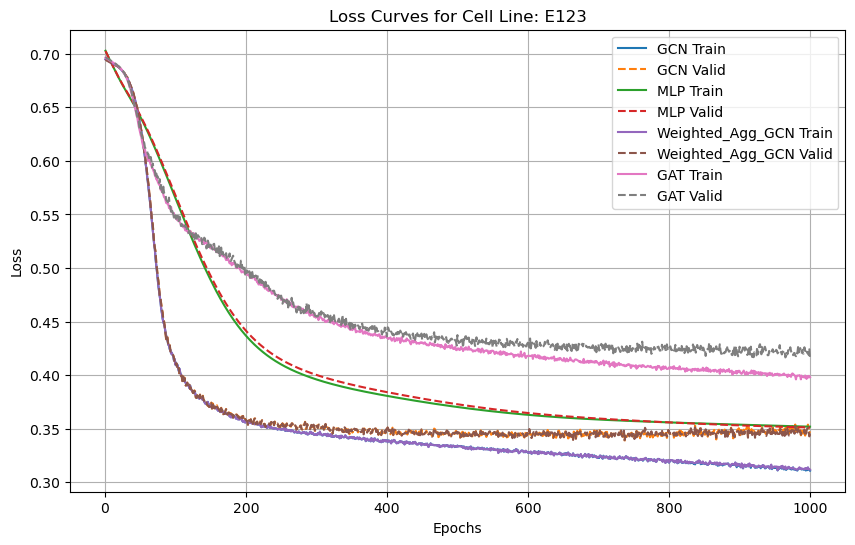

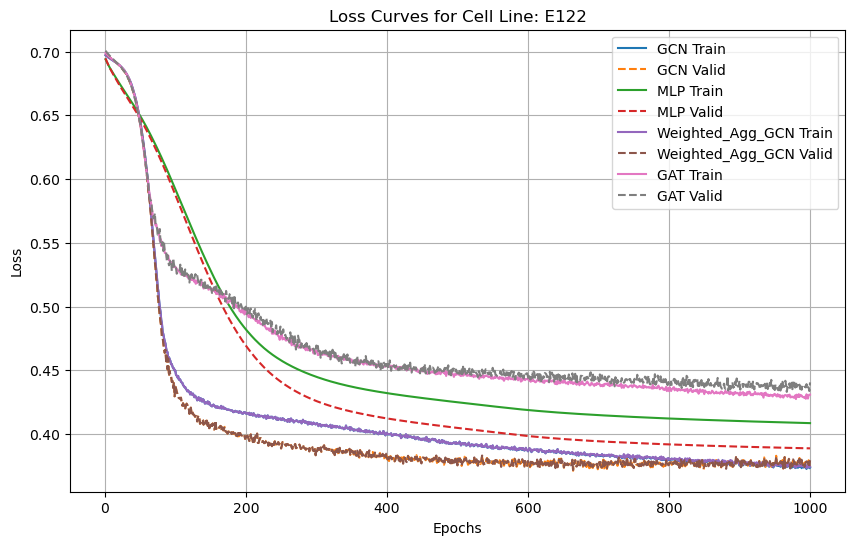

In [7]:
for cl in cell_line_alias.keys():
    plt.figure(figsize=(10, 6))
    for model in models:
        train, valid = all_losses[cl].loc[model][0][:1000], all_losses[cl].loc[model][1][:1000]
        plt.plot(num_epochs, train, label=f'{model} Train')
        plt.plot(num_epochs, valid, linestyle='--', label=f'{model} Valid')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title(f'Loss Curves for Cell Line: {cl}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Regression

In [8]:
regression_res = pd.read_csv('regression_res.csv', index_col = 0)
regression_res

,E116,E122,E123
GCN,0.766165,0.769109,0.794361
MLP,0.724482,0.673191,0.723522


In [9]:
directory = 'scatter_data_regression'

gcn_preds_reg_E116 = np.load(os.path.join(directory, 'gcn_preds_reg_E116.npy'))
gcn_preds_lab_E116 = np.load(os.path.join(directory, 'gcn_preds_lab_E116.npy'))

gcn_preds_reg_E123 = np.load(os.path.join(directory, 'gcn_preds_reg_E123.npy'))
gcn_preds_lab_E123 = np.load(os.path.join(directory, 'gcn_preds_lab_E123.npy'))

gcn_preds_reg_E122 = np.load(os.path.join(directory, 'gcn_preds_reg_E122.npy'))
gcn_preds_lab_E122 = np.load(os.path.join(directory, 'gcn_preds_lab_E122.npy'))

mlp_preds_reg_E116 = np.load(os.path.join(directory, 'mlp_preds_reg_E116.npy'))
mlp_preds_lab_E116 = np.load(os.path.join(directory, 'mlp_preds_lab_E116.npy'))

mlp_preds_reg_E123 = np.load(os.path.join(directory, 'mlp_preds_reg_E123.npy'))
mlp_preds_lab_E123 = np.load(os.path.join(directory, 'mlp_preds_lab_E123.npy'))

mlp_preds_reg_E122 = np.load(os.path.join(directory, 'mlp_preds_reg_E122.npy'))
mlp_preds_lab_E122 = np.load(os.path.join(directory, 'mlp_preds_lab_E122.npy'))

In [10]:
def make_scatter(model):
    intercept = 0.1
    fig, axs = plt.subplots(1, 3, figsize=(20 ,5))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    fig.suptitle(f"{model}", fontsize=16)
    
    pcc_E116 = regression_res['E116'][model]
    axs[0].scatter(gcn_preds_reg_E116, gcn_preds_lab_E116)
    x_vals_E116 = np.linspace(0, 3, 100)
    y_vals_E116 = pcc_E116 * x_vals_E116 + intercept
    axs[0].plot(x_vals_E116, y_vals_E116, color='red', lw=2, label=f"Slope = {pcc_E116}, Intercept = {intercept}")
    axs[0].text(0.5, 3.5, f"PCC = {pcc_E116:.2f}", fontsize=14, color='black')
    axs[0].set_xlabel("Observed Log10 Expression")
    axs[0].set_ylabel("Predicted Log10 Expression")
    axs[0].set_xlim(0, 4)
    axs[0].set_ylim(0, 4)
    
    pcc_E123 = regression_res['E123'][model]
    axs[1].scatter(gcn_preds_reg_E123, gcn_preds_lab_E123)
    x_vals_E123 = np.linspace(0, 3, 100)
    y_vals_E123 = pcc_E123 * x_vals_E123 + intercept
    axs[1].plot(x_vals_E123, y_vals_E123, color='red', lw=2, label=f"Slope = {pcc_E123}, Intercept = {intercept}")
    axs[1].text(0.5, 3.5, f"PCC = {pcc_E123:.2f}", fontsize=14, color='black')
    axs[1].set_xlabel("Observed Log10 Expression")
    axs[1].set_yticks([])
    axs[1].set_xlim(0, 4)
    axs[1].set_ylim(0, 4)
    
    pcc_E122 = regression_res['E122'][model]
    axs[2].scatter(gcn_preds_reg_E122, gcn_preds_lab_E122)
    x_vals_E122 = np.linspace(0, 3, 100)
    y_vals_E122 = pcc_E122 * x_vals_E122 + intercept
    axs[2].plot(x_vals_E122, y_vals_E122, color='red', lw=2, label=f"Slope = {pcc_E122}, Intercept = {intercept}")
    axs[2].text(0.5, 3.5, f"PCC = {pcc_E122:.2f}", fontsize=14, color='black')
    axs[2].set_xlabel("Observed Log10 Expression")
    axs[2].set_yticks([])
    axs[2].set_xlim(0, 4)
    axs[2].set_ylim(0, 4)
    
    fig.show()

In [ ]:
make_scatter('GCN')

In [ ]:
make_scatter('MLP')